# Exploratory data analysis

## Introduction
This notebook documents the exploratory data analysis (EDA), data cleaning, preprocessing, feature selection and transformation for predicting the `outcome` variable using the provided dataset `CW1_train.csv`.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import math

## 1. Load and inspect data 
- Load the dataset and inspect the structure using the first 5 rows.
- Output the dataset information and summary statistics. 

In [88]:
# Load the training dataset
training_data = pd.read_csv("CW1_train.csv")

# Inspect the first 5 rows
print("First 5 rows:")
print(training_data.head())
print("\n")

First 5 rows:
     outcome  carat        cut color clarity  depth  table  price     x     y  \
0 -26.701232   1.14      Ideal     G     VS1   62.3   56.0   7948  6.73  6.70   
1   6.548093   0.38    Premium     H     VS2   60.5   59.0    898  4.69  4.66   
2   6.612562   0.50  Very Good     E     SI1   60.7   58.0   1351  5.09  5.13   
3  -5.073562   0.70    Premium     D     SI1   61.2   58.0   2512  5.74  5.70   
4 -14.436557   0.83      Ideal     G     SI2   62.4   54.0   2751  6.01  6.08   

   ...        a6        a7        a8        a9       a10        b6        b7  \
0  ...  0.168836 -0.273758  1.107832  1.247795  0.482344  0.489511 -0.321138   
1  ... -0.256549  0.315373 -0.030326 -0.114335 -1.059588 -1.761360 -1.343951   
2  ... -1.193327 -0.657307 -0.591726 -0.446856 -0.765286 -0.816544 -1.397794   
3  ... -1.740788 -1.778860 -0.825070  0.444932  1.173109  0.453606 -0.263440   
4  ... -0.859322  1.409268  0.861992  1.109063 -1.436722 -1.461618  0.081787   

         b8       

In [89]:
# Information regarding the training dataset
print("Training data information")
print(training_data.info())
print("\n ------------------- \n")

Training data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outcome  10000 non-null  float64
 1   carat    10000 non-null  float64
 2   cut      10000 non-null  object 
 3   color    10000 non-null  object 
 4   clarity  10000 non-null  object 
 5   depth    10000 non-null  float64
 6   table    10000 non-null  float64
 7   price    10000 non-null  int64  
 8   x        10000 non-null  float64
 9   y        10000 non-null  float64
 10  z        10000 non-null  float64
 11  a1       10000 non-null  float64
 12  a2       10000 non-null  float64
 13  a3       10000 non-null  float64
 14  a4       10000 non-null  float64
 15  a5       10000 non-null  float64
 16  b1       10000 non-null  float64
 17  b2       10000 non-null  float64
 18  b3       10000 non-null  float64
 19  b4       10000 non-null  float64
 20  b5       10000 non-null  

In [90]:
# Descriptive Statistics 
print("Training data description")
print(training_data.describe())
print("\n")

Training data description
            outcome         carat         depth         table         price  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -4.979081      0.798407     61.748060     57.467360   3910.841900   
std       12.722224      0.472046      1.429631      2.247036   3940.369616   
min      -44.879471      0.200000     50.800000     44.000000    326.000000   
25%      -13.989962      0.400000     61.000000     56.000000    965.000000   
50%       -5.442794      0.710000     61.900000     57.000000   2441.000000   
75%        3.918593      1.040000     62.500000     59.000000   5226.000000   
max       39.675966      4.000000     70.500000     73.000000  18791.000000   

                  x             y             z            a1            a2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.733974      5.741665      3.540757      0.502349      0.507509   
std        1.114850      

## 2. Visualisation 
- Visualise the distribution of the target variable ("outcome"), numerical features, and categorical features. 
- Analyse the relationships between features

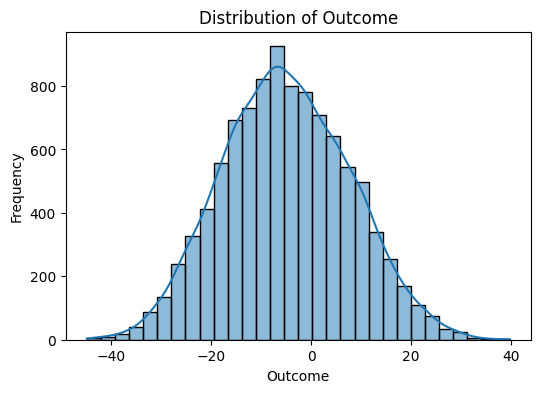

In [91]:
# Distribution of the target variable 

plt.figure(figsize=(6, 4))
sns.histplot(training_data['outcome'], kde=True, bins=30)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

In [92]:
# Separate the numerical and categorical features
numerical_features = training_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = training_data.select_dtypes(exclude=[np.number]).columns.tolist()

# Exclude the target variable 'outcome' from numerical features 
numerical_features.remove('outcome')

# Output the numerical and categorical features
print("Numerical Features:", numerical_features)
print("Number of Numerical Features: ", len(numerical_features))
print("Categorical Features:", categorical_features)
print("Number of Categorical Features: ", len(categorical_features))


Numerical Features: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
Number of Numerical Features:  27
Categorical Features: ['cut', 'color', 'clarity']
Number of Categorical Features:  3


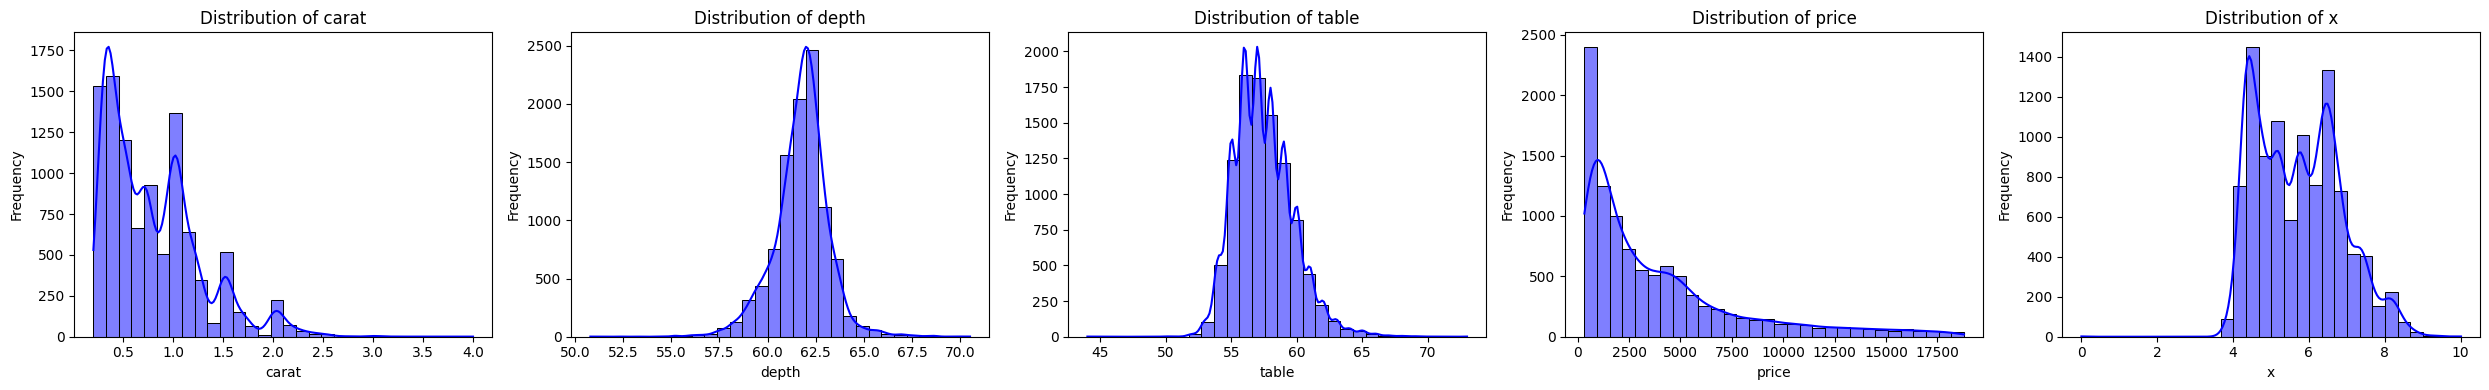

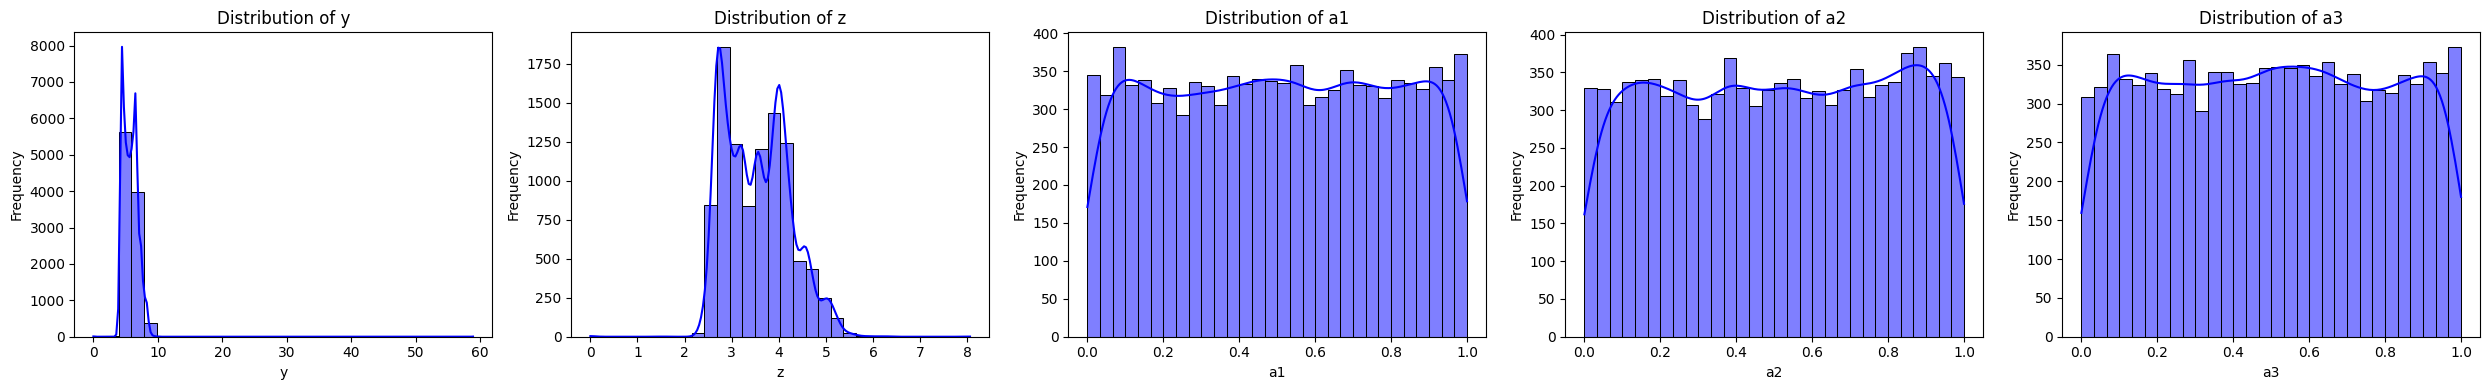

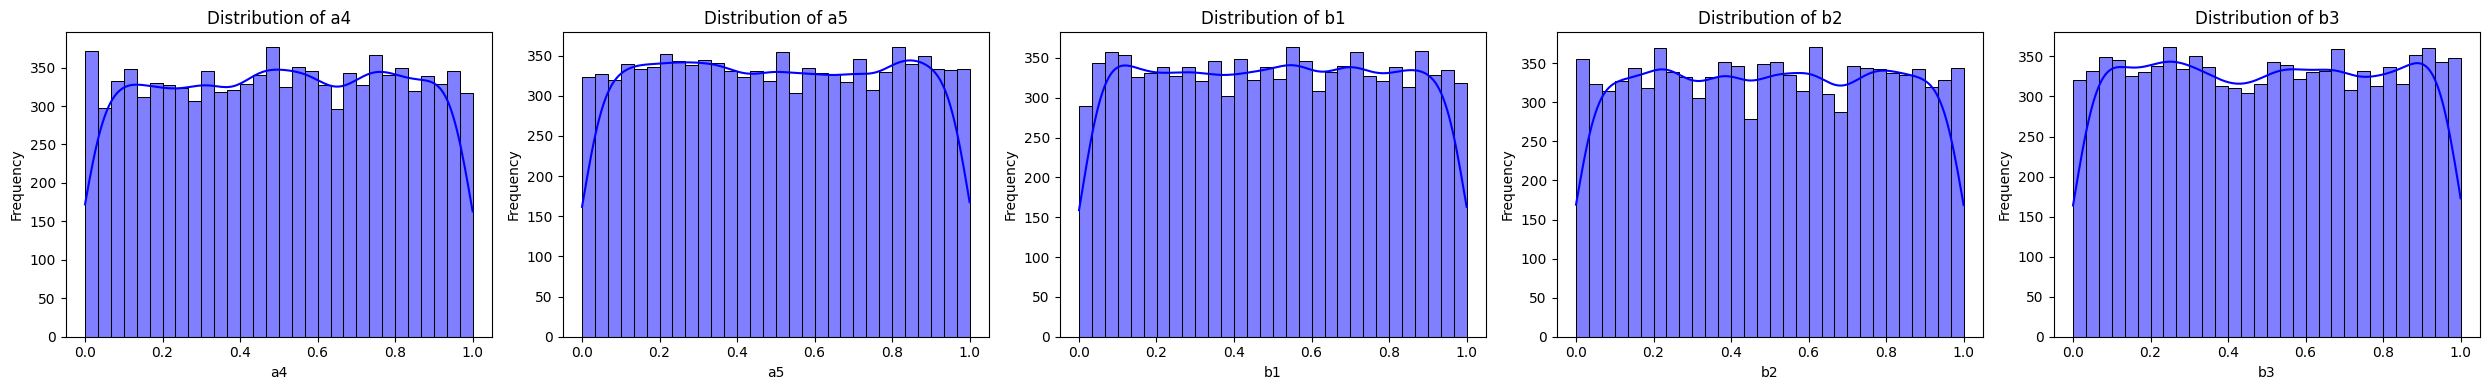

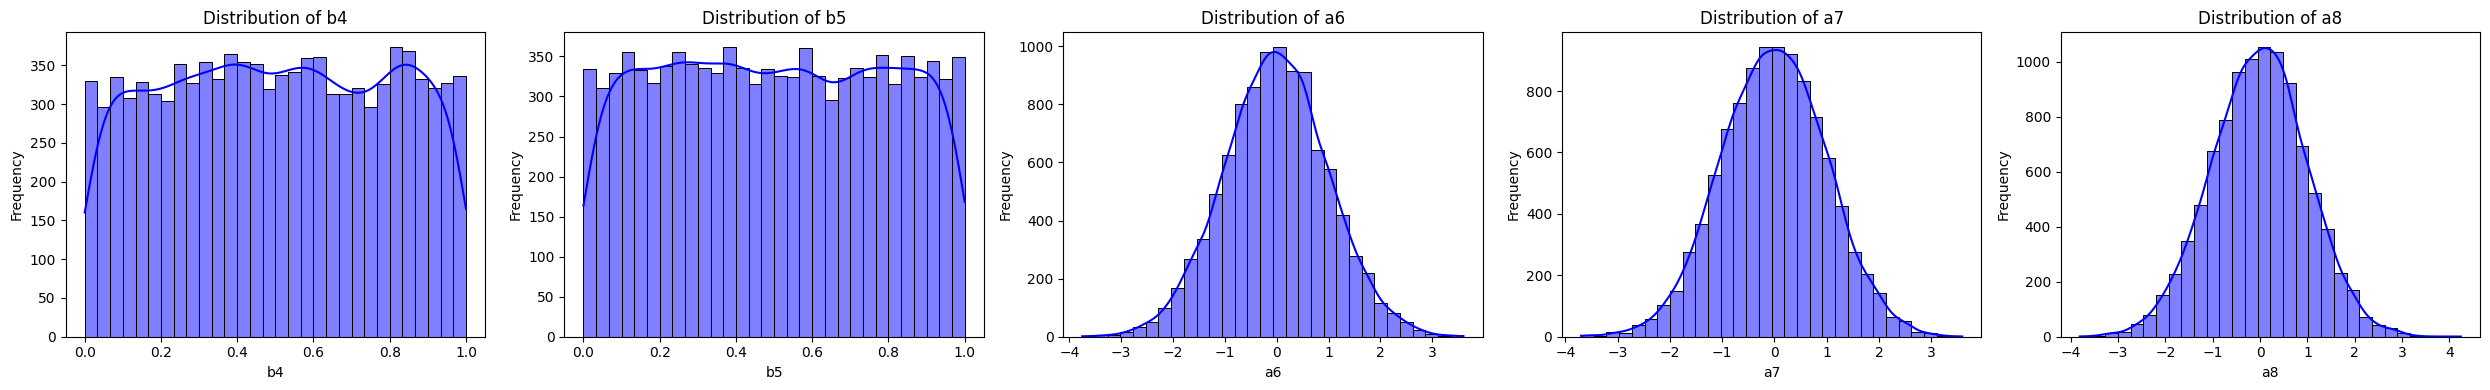

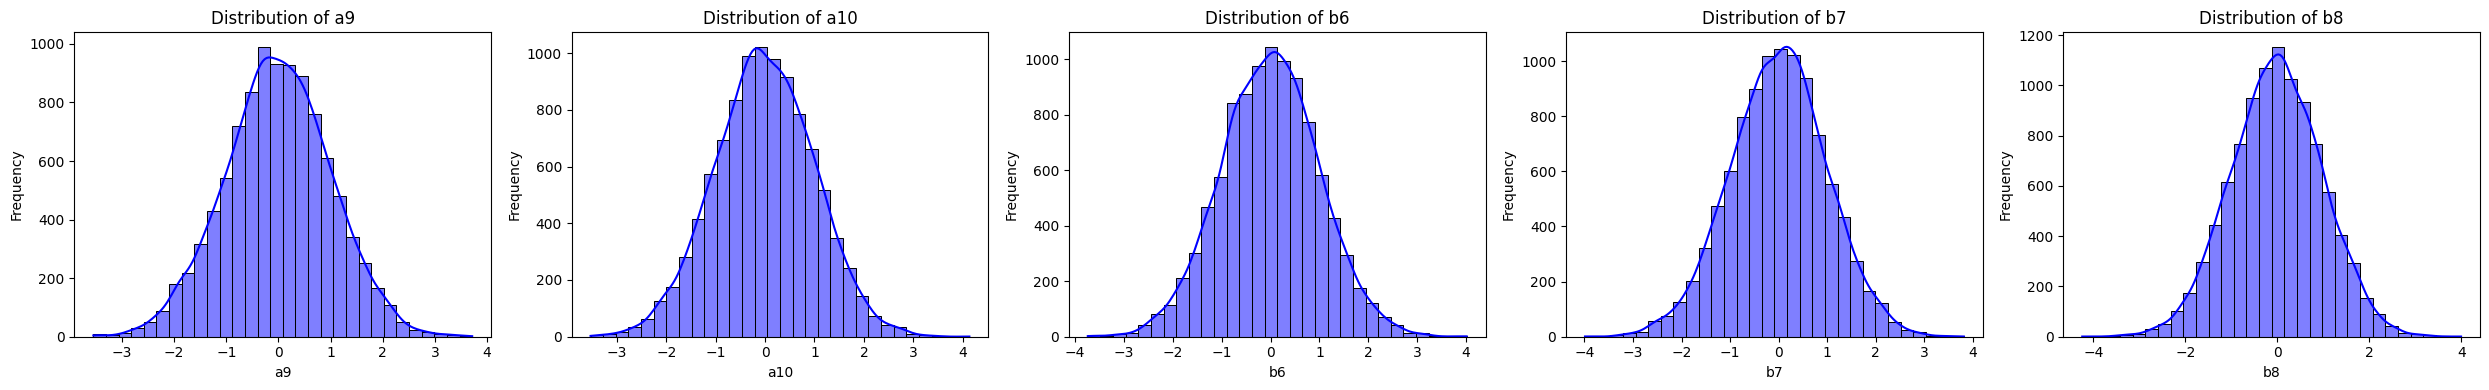

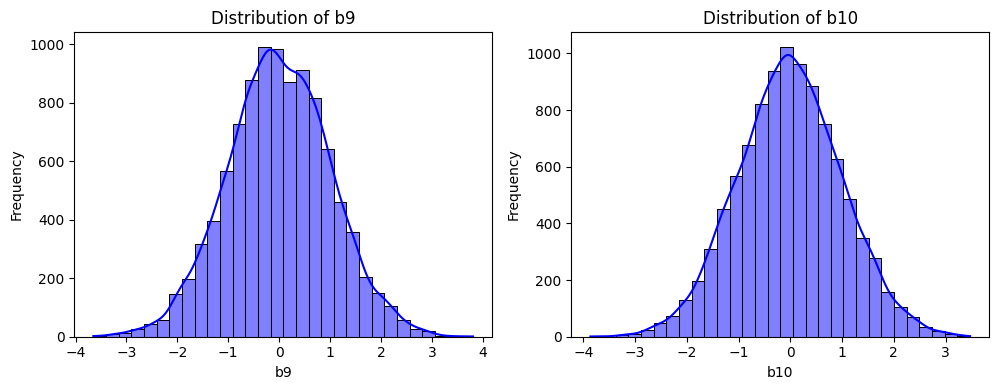

In [93]:
# Plot the distribution of the numerical features
features_per_figure = 5
for start_idx in range(0, len(numerical_features), features_per_figure):
    end_idx = start_idx + features_per_figure
    subset_features = numerical_features[start_idx:end_idx]
    
    # Dynamically calculate grid dimensions
    n_cols = 5
    n_rows = math.ceil(len(subset_features) / n_cols)
    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    
    for i, feature in enumerate(subset_features):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(training_data[feature], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

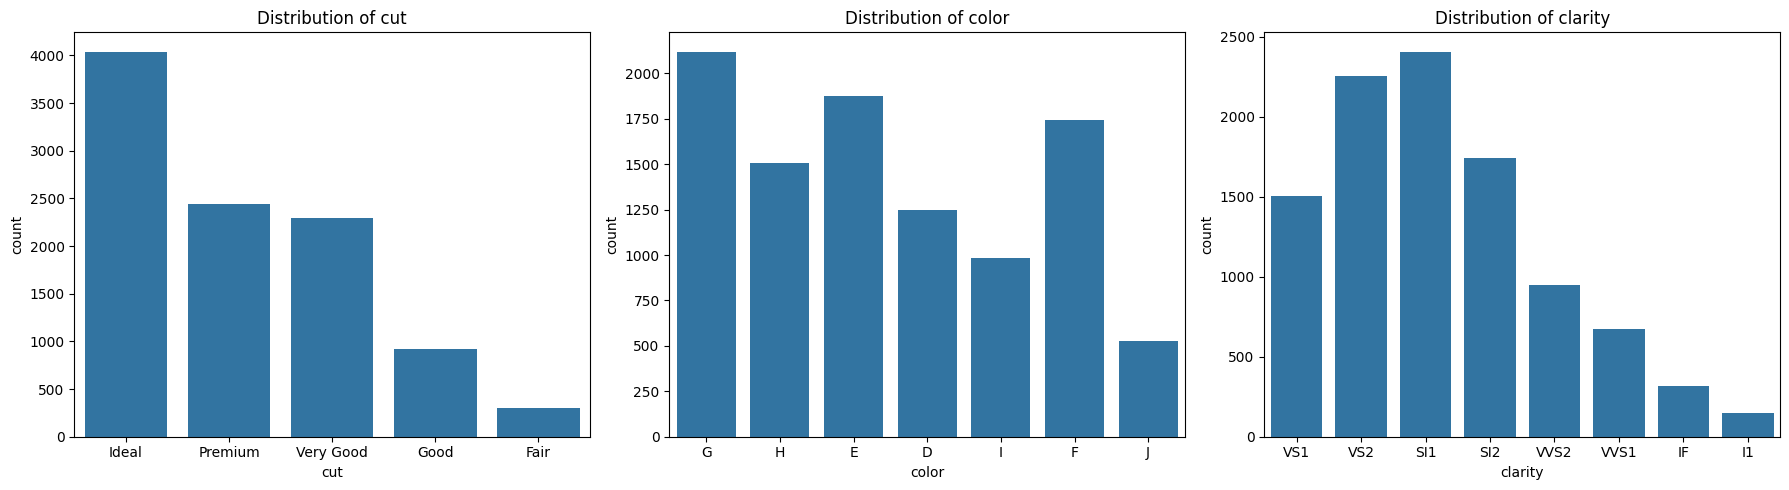

In [94]:
# Plot the distribution of the categorical features 
categorical_cols = ['cut', 'color', 'clarity']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=training_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x')

plt.tight_layout()
plt.show()

## 3. Data Cleaning and Preprocessing
Handle missing values, duplicates, remove outliers, encode categorical variables, and scale numerical variables.

### 3.1 Identify and handle missing values

In [95]:
# Check for missing values
print("Training data missing values:")
training_data.isnull().sum()

Training data missing values:


outcome    0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
a1         0
a2         0
a3         0
a4         0
a5         0
b1         0
b2         0
b3         0
b4         0
b5         0
a6         0
a7         0
a8         0
a9         0
a10        0
b6         0
b7         0
b8         0
b9         0
b10        0
dtype: int64

### 3.2 Identify and drop duplicate rows

In [96]:
# Check if there are duplicates
print(f"Number of duplicate rows: {training_data.duplicated().sum()}")

# Drop duplicates if they exist
if training_data.duplicated().sum():
    training_data = training_data.drop_duplicates()

Number of duplicate rows: 0


### 3.3 Remove outliers from the numerical features 

In [97]:
# Remove outliers from numerical features (excluding "outcome" to not lose critical data points) 

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

training_data = remove_outliers(training_data, numerical_features)


### 3.4 Encode Categorical features

In [ ]:
training_data = pd.get_dummies(training_data, columns=['color','cut','clarity'], drop_first=True)
''' Poor performance
# Ordinal encoding for 'cut' and 'clarity' (if they have inherent order)
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

training_data['cut'] = training_data['cut'].map({v: k for k, v in enumerate(cut_order)})
training_data['clarity'] = training_data['clarity'].map({v: k for k, v in enumerate(clarity_order)})

# One-hot encode 'color' (nominal feature)
training_data = pd.get_dummies(training_data, columns=['color'], drop_first=True)
'''

"\n# Ordinal encoding for 'cut' and 'clarity' (if they have inherent order)\ncut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']\nclarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']\n\ntraining_data['cut'] = training_data['cut'].map({v: k for k, v in enumerate(cut_order)})\ntraining_data['clarity'] = training_data['clarity'].map({v: k for k, v in enumerate(clarity_order)})\n\n# One-hot encode 'color' (nominal feature)\ntraining_data = pd.get_dummies(training_data, columns=['color'], drop_first=True)\n"

### 3.5 Transform skewed numerical features

In [99]:
# Transform skewed numerical features to stabilize variance and reduce the effect of outliers
from scipy.stats import skew

# Calculate skewness for each numerical feature (excluding 'outcome')
skewed_feats = training_data[numerical_features].apply(lambda x: skew(x.dropna()))
print("Skewness before transformation:\n", skewed_feats)

# Define a skewness threshold; features with absolute skewness greater than this value will be transformed
skew_threshold = 0.75

# Transform features with high skewness using log1p transformation (or shifted log1p if necessary)
for feature in numerical_features:
    feature_skew = skew(training_data[feature].dropna())
    if abs(feature_skew) > skew_threshold:
        if training_data[feature].min() > 0:
            training_data[feature] = np.log1p(training_data[feature])
            print(f"Applied log1p transformation to {feature} (skewness: {feature_skew:.2f})")
        else:
            # Shift values so that the minimum is 1 before applying log1p transformation
            training_data[feature] = np.log1p(training_data[feature] - training_data[feature].min() + 1)
            print(f"Shifted and applied log1p transformation to {feature} (skewness: {feature_skew:.2f})")


Skewness before transformation:
 carat    0.652558
depth   -0.278661
table    0.382152
price    1.138506
x        0.220027
y        0.214619
z        0.216968
a1      -0.003645
a2      -0.012664
a3      -0.004910
a4      -0.016694
a5       0.010033
b1      -0.002582
b2      -0.005727
b3       0.006778
b4       0.011203
b5       0.017663
a6       0.013098
a7       0.006303
a8      -0.038947
a9      -0.038392
a10     -0.024184
b6      -0.001144
b7      -0.015758
b8      -0.003247
b9       0.020138
b10      0.004568
dtype: float64
Applied log1p transformation to price (skewness: 1.14)


## 4. Feature Selection
- Analyse the feature correlations and remove highly correlated features to reduce multicollinearity. 

### 4.1 Visualise Correlation Heatmap 

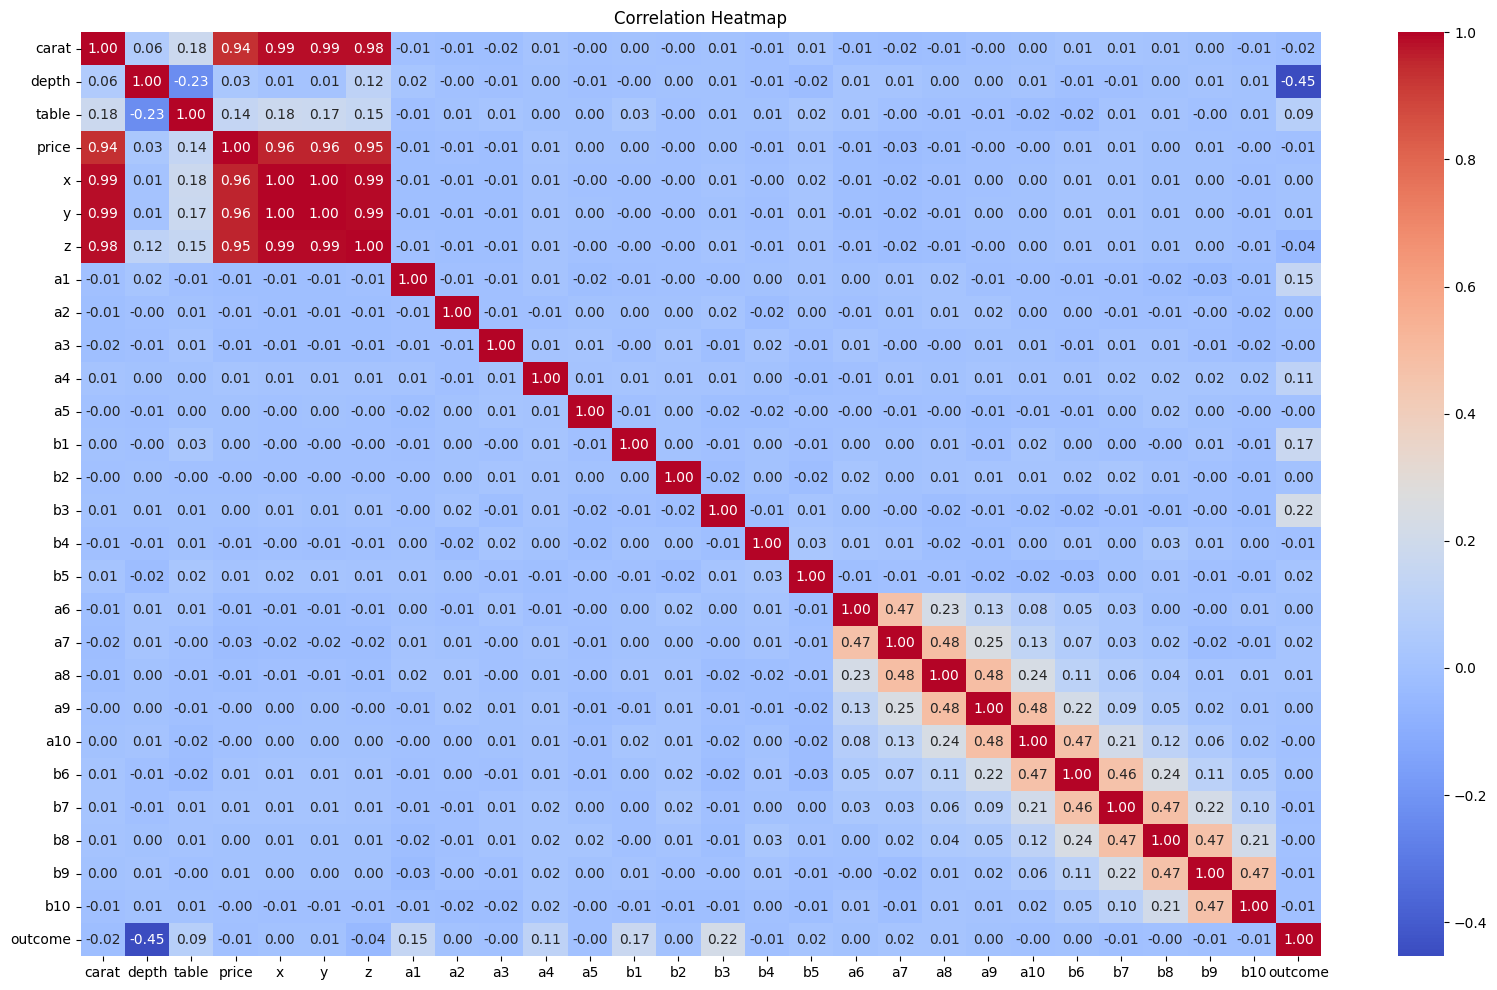

In [101]:
# Correlation heatmap (excluding 'outcome')
plt.figure(figsize=(20, 12))
correlation_matrix = training_data[numerical_features + ['outcome']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [102]:
# Drop highly correlated features 
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

training_data = training_data.drop(columns=high_corr_features)
numerical_features = [feature for feature in numerical_features if feature not in high_corr_features]
print("Updated Numerical Features:", numerical_features)

Updated Numerical Features: ['carat', 'depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']


# 5. Save Cleaned Data
The cleaned and preprocessed dataset is saved 

In [ ]:
training_data.to_csv('cleaned_training_data.csv', index=False)